# **Importing necessary Libraries:**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, classification_report



# **3.2 For Regression Task**

## **1. Exploratory Data Analysis and Data Understanding:**

### **1.1 Choosing a Dataset:**

* Load the dataset into a DataFrame object using the Pandas library.

In [8]:
df = pd.read_csv('/content/drive/MyDrive/CourseworkDatasets/RegressionTaskDataset(Sleep).csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Perform an initial analysis to gather a detailed description of the dataset.

1. When and by whom was the dataset created?




* The Sleep health and lifestyle dataset is a synthetic dataset created by Laksika Tharmalingam for illustrative purpose.

2. How did you access the dataset?

* I accessed this dataset from Kaggle.com

  Link to dataset: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

3. How does it align with the chosen UNSDG?

* This dataset aligns with UNSDG Goal 3: Good Health and Well-being, as it contains information related to sleep, physical activity, stress levels, and health indicators such as BMI, blood pressure, and heart rate.

4. List all the attributes (columns) present in the dataset.

* Person ID
* Gender
* Age
* Occupation
* Sleep Duration
* Quality of Sleep
* Physical Activity Level
* Stress Level
* BMI Category
* Blood Pressure
* Heart Rate
* Daily Steps
* Sleep Disorder

* Dataset Description

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
df.shape

(374, 13)

* Summary Statistics

In [12]:
df.describe(include="all")

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


In [13]:
df.var(numeric_only=True)

,0
Person ID,1.168750e+04
Age,7.522324e+01
Sleep Duration,6.330696e-01
Quality of Sleep,1.432703e+00
Physical Activity Level,4.339224e+02
Stress Level,3.148944e+00
Heart Rate,1.710381e+01
Daily Steps,2.617651e+06


In [14]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


* Identify potential questions that the dataset could help answer.

* Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).

In [15]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


### **1.2. Conducting Exploratory Data Analysis (EDA):**

#### (a) Perform data cleaning and compute summary statistics for the dataset.

In [18]:
# Extracting column names to a list
col = df.columns.to_list()
col

['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [19]:
# Encoding categorical variables
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1}) #Replacing 0 for male and 1 for female.


<ipython-input-19-4500b99685a2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1}) #Replacing 0 for male and 1 for female.


In [20]:
df['Gender']

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
369,1
370,1
371,1
372,1


In [21]:
# Encoding categorical variables in Sleep Disorder column
df['Sleep Disorder'] = df['Sleep Disorder'].replace({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2})

<ipython-input-21-01cef46957c5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Disorder'] = df['Sleep Disorder'].replace({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2})


In [22]:
df['Sleep Disorder'].head(10)

,Sleep Disorder
0,NaN
1,NaN
2,NaN
3,2.0
4,2.0
5,1.0
6,1.0
7,NaN
8,NaN
9,NaN


In [23]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(0)

In [24]:
df['Sleep Disorder'].head(10)

,Sleep Disorder
0,0.0
1,0.0
2,0.0
3,2.0
4,2.0
5,1.0
6,1.0
7,0.0
8,0.0
9,0.0


In [25]:
# Splitting Blood Pressure into Systolic and Diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df['Systolic_BP'].head(10)

,Systolic_BP
0,126.0
1,125.0
2,125.0
3,140.0
4,140.0
5,140.0
6,140.0
7,120.0
8,120.0
9,120.0


In [26]:
df['Diastolic_BP'].head(10)

,Diastolic_BP
0,83.0
1,80.0
2,80.0
3,90.0
4,90.0
5,90.0
6,90.0
7,80.0
8,80.0
9,80.0


In [27]:
# Using One-Hot Encoding to encode columns 'Occupation' and 'BMI Category'
df = pd.get_dummies(df, columns=['Occupation', 'BMI Category'])

In [28]:
#Dropping unnecessary columns
df.drop(['Person ID', 'Blood Pressure'], axis=1, inplace=True)

In [29]:
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight'],
      dtype='object')

In [30]:
df.head(5)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,0,27,6.1,6,42,6,77,4200,0.0,126.0,...,False,False,False,False,True,False,False,False,False,True
1,0,28,6.2,6,60,8,75,10000,0.0,125.0,...,False,False,False,False,False,False,True,False,False,False
2,0,28,6.2,6,60,8,75,10000,0.0,125.0,...,False,False,False,False,False,False,True,False,False,False
3,0,28,5.9,4,30,8,85,3000,2.0,140.0,...,False,True,False,False,False,False,False,False,True,False
4,0,28,5.9,4,30,8,85,3000,2.0,140.0,...,False,True,False,False,False,False,False,False,True,False


In [31]:
# Converting boolean columns to integer (0 and 1)
df = df.astype(int)

In [32]:
df.head(5)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,0,27,6,6,42,6,77,4200,0,126,...,0,0,0,0,1,0,0,0,0,1
1,0,28,6,6,60,8,75,10000,0,125,...,0,0,0,0,0,0,1,0,0,0
2,0,28,6,6,60,8,75,10000,0,125,...,0,0,0,0,0,0,1,0,0,0
3,0,28,5,4,30,8,85,3000,2,140,...,0,1,0,0,0,0,0,0,1,0
4,0,28,5,4,30,8,85,3000,2,140,...,0,1,0,0,0,0,0,0,1,0


#### (b) Explore the data through visualizations and charts. Ensure you explain and summarize the insights gained from each chart.

In [33]:
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,0,27,6,6,42,6,77,4200,0,126,...,0,0,0,0,1,0,0,0,0,1
1,0,28,6,6,60,8,75,10000,0,125,...,0,0,0,0,0,0,1,0,0,0
2,0,28,6,6,60,8,75,10000,0,125,...,0,0,0,0,0,0,1,0,0,0
3,0,28,5,4,30,8,85,3000,2,140,...,0,1,0,0,0,0,0,0,1,0
4,0,28,5,4,30,8,85,3000,2,140,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,8,9,75,3,68,7000,2,140,...,1,0,0,0,0,0,0,0,0,1
370,1,59,8,9,75,3,68,7000,2,140,...,1,0,0,0,0,0,0,0,0,1
371,1,59,8,9,75,3,68,7000,2,140,...,1,0,0,0,0,0,0,0,0,1
372,1,59,8,9,75,3,68,7000,2,140,...,1,0,0,0,0,0,0,0,0,1


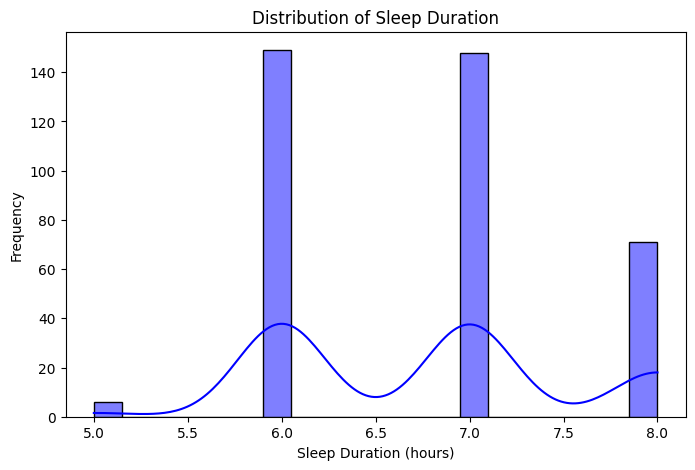

In [34]:
# Extracting the target variable for univariate analysis
sleep_duration = df['Sleep Duration']

# Univariate Analysis: Histogram for the distribution of Sleep Duration
plt.figure(figsize=(8, 5))
sns.histplot(df["Sleep Duration"], bins=20, kde=True, color="blue")
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-35-8cd08dfd981a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')


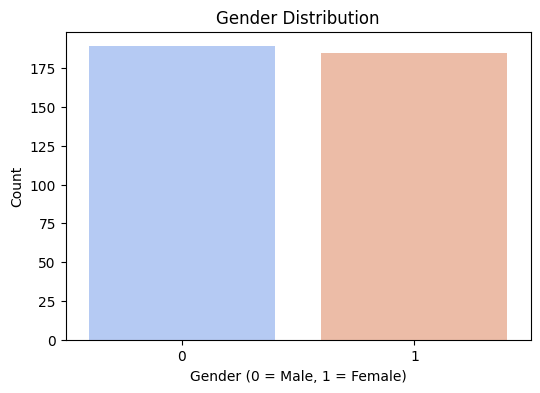

In [35]:
# Univariate Analysis: Histogram for the distribution of Age
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

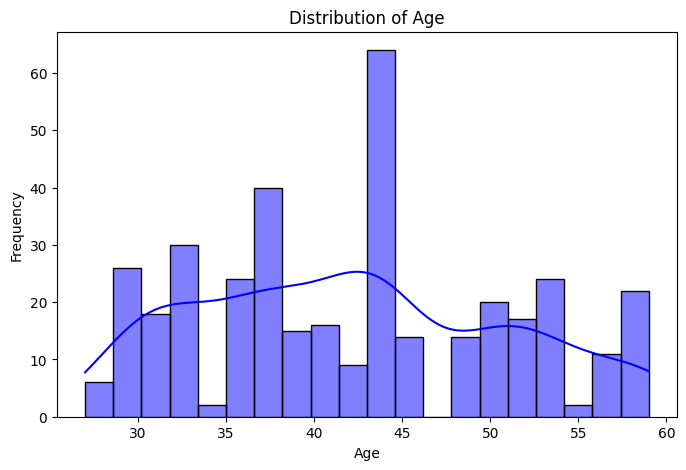

In [36]:
# Univariate Analysis: Histogram for the distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

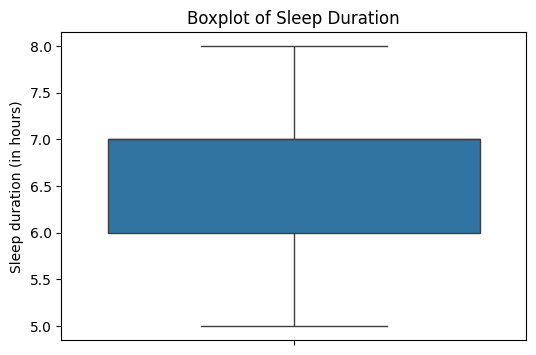

In [37]:
 #Univariate Analysis, Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(y=sleep_duration)
plt.title("Boxplot of Sleep Duration")
plt.ylabel("Sleep duration (in hours)")
plt.show()

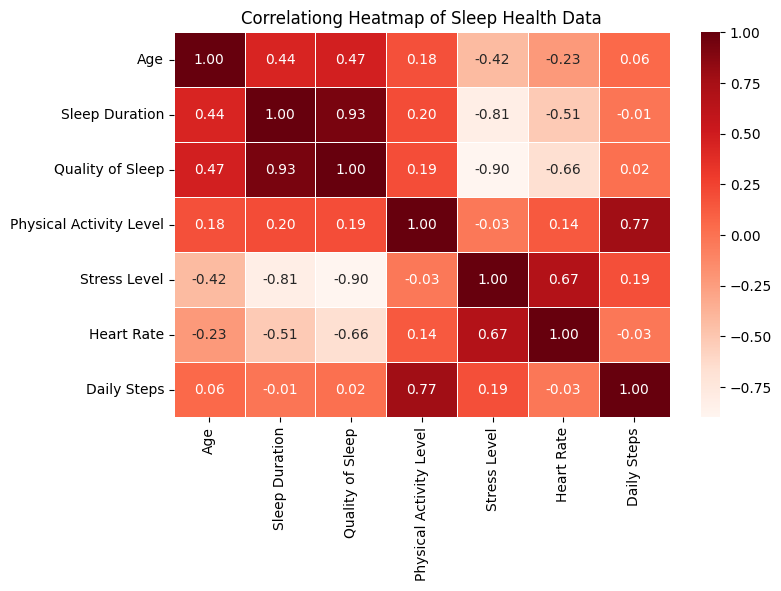

In [38]:
# Bivariate Analysis: Correlation Heatmap
# Create a correlation matrix
cormat = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].corr()

#Plotting a heatmap for the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(cormat, cmap = 'Reds', annot = True, fmt='.2f', linewidths = 0.4)
plt.title("Correlationg Heatmap of Sleep Health Data")
plt.show()

## **2. Build a Model from Scratch:**

### **Step 1: Data Preprocessing and Feature Normalization**:



In [39]:
X = df.drop('Sleep Duration', axis=1) #dropping 'Sleep Duration' from the dataframe
y = df['Sleep Duration'] #extracting the 'Sleep Duration' column from the dataframe and assigning it to variable 'y'

In [40]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (column of ones)
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

### **Step 2: Defining Logistic Regression Functions:**

In [42]:
def cost_function(X, y, w):
    """
    Calculate Mean Square Error (MSE)
    """
    m = len(y)
    Y_pred = np.dot(X, w)
    cost = (1/(2*m)) * np.sum((Y_pred - y) ** 2)
    return cost

### **Step 3: Defining Gradient Descent for Optimization:**

In [43]:
def gradient_descent(X, y, w, alpha, iterations):
    """
    Perform gradient descent to optimize weights
    """
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        Y_pred = np.dot(X, w)
        loss = Y_pred - y
        gradients = (1/m) * np.dot(X.T, loss)
        w = w - alpha * gradients
        cost_history[i] = cost_function(X, y, w)

    return w, cost_history


In [44]:
def rmse(y, y_pred):
    """
    Calculate Root Mean Square Error
    """
    return np.sqrt(np.mean((y - y_pred) ** 2))

def r2_score(y, y_pred):
    """
    Calculate R-squared score
    """
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

### **Step 4: Train the Model:**

In [45]:
# Initialize parameters
w = np.zeros(X_train_bias.shape[1])
alpha = 0.01
iterations = 1000

# Train the model
w_optimal, cost_history = gradient_descent(X_train_bias, y_train, w, alpha, iterations)

# Make predictions
y_pred_test = np.dot(X_test_bias, w_optimal)
y_pred_train = np.dot(X_train_bias, w_optimal)

# Evaluate Model
model_rmse = rmse(y_test, y_pred_test)
model_r2 = r2_score(y_test, y_pred_test)

model_rmse_train = rmse(y_train, y_pred_train)
model_r2_train = r2_score(y_train, y_pred_train)

print(f"Final Weights:\n {w_optimal}")
print(f"\nRMSE (Test): {model_rmse}")
print(f"\nR-squared (Test): {model_r2}")
print(f"\nRMSE (Train): {model_rmse_train}")
print(f"\nR-squared (Train): {model_r2_train}")


Final Weights:
 [ 6.78231588e+00 -2.99210264e-02  1.51254745e-01  3.88075754e-01
  5.36535818e-02 -2.74202024e-01  1.73818572e-02 -7.31838605e-02
  5.17135642e-02 -1.29939196e-01 -6.05062945e-02 -9.90311384e-02
  9.60715092e-02 -2.25989217e-02  3.14676236e-03 -4.16656847e-02
  1.28366632e-01 -7.60082854e-03 -3.55848377e-03 -3.95421330e-04
 -9.81526651e-04 -1.45836859e-01  4.03082827e-02  5.24040520e-04
  1.07579418e-02 -4.44365422e-02]

RMSE (Test): 0.1132273293756416

R-squared (Test): 0.9784731617429365

RMSE (Train): 0.17389100035654234

R-squared (Train): 0.9488821838263574


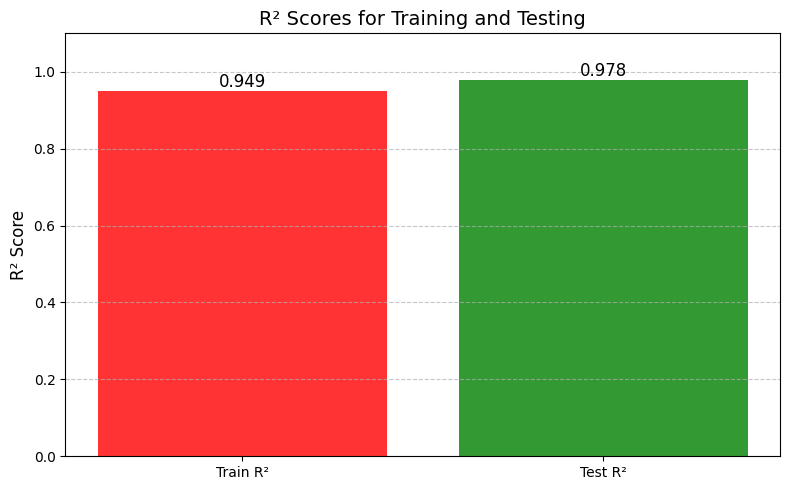

In [59]:
# R² Scores for Training and Testing
scores = ['Train R²', 'Test R²']
r2_values = [model_r2_train, model_r2]

# Plot R² Scores
plt.figure(figsize=(8, 5))
bars = plt.bar(scores, r2_values, color=['red', 'green'], alpha=0.8)

# Add values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{bar.get_height():.3f}", ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('R² Scores for Training and Testing', fontsize=14)
plt.ylabel('R² Score', fontsize=12)
plt.ylim(0, 1.1)  # Ensure the graph scales appropriately
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## **3. Build a Primary Model:**

### **1. Split the dataset into training and testing sets.**

In [46]:
X = df.drop('Sleep Duration', axis=1) #dropping 'Sleep Duration' from the dataframe
y = df['Sleep Duration'] #extracting the 'Sleep Duration' column from the dataframe and assigning it to variable 'y'

In [47]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Normalize features (important for models like Linear Regression & Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **2. Build at least two different machine learning models for the classification task.**

#### **Model 1: Line Regression**




In [49]:
# Initialize the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

#### **Model 2: Random Forest**

In [50]:
# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

### **3. Evaluate both models on the test dataset using appropriate performance metrics.**

In [51]:
# Calculate MAE, RMSE, and R-squared for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate MAE, RMSE, and R-squared for Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print Evaluation Metrics for Both Models
print("Linear Regression Model Evaluation:")
print(f"MAE: {mae_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}")

print("\nRandom Forest Regressor Evaluation:")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")

Linear Regression Model Evaluation:
MAE: 0.09536718603046994
RMSE: 0.12525389143982837
R-squared: 0.9736573067374286

Random Forest Regressor Evaluation:
MAE: 0.01799999999999997
RMSE: 0.07154485772343572
R-squared: 0.991405223880597


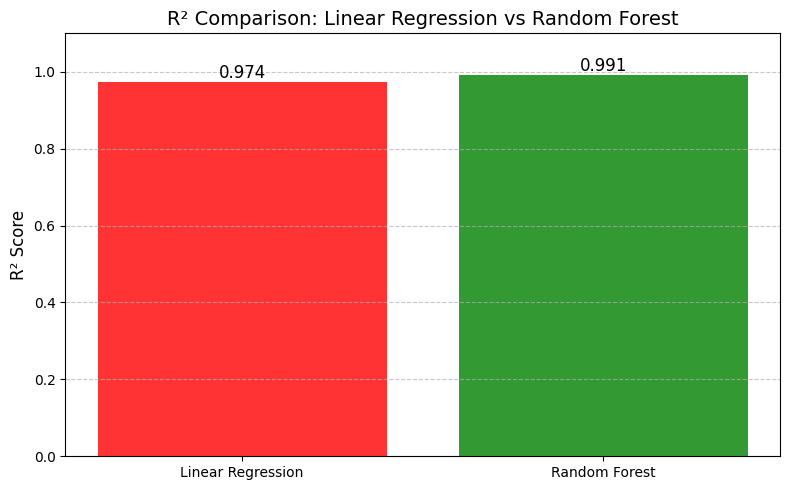

In [61]:
# R² Scores for Linear Regression and Random Forest
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_linear, r2_rf]

# Plot R² Scores
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color=['red', 'green'], alpha=0.8)

# Annotate values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{bar.get_height():.3f}", ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('R² Comparison: Linear Regression vs Random Forest', fontsize=14)
plt.ylabel('R² Score', fontsize=12)
plt.ylim(0, 1.1)  # Ensure the graph scales appropriately
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### **4. Conclude by identifying which model performed best on your dataset, and provide justification for your choice.**

The Random Forest Regressor demonstrates better performance with an MAE of 0.018, RMSE of 0.072, and R-squared of 0.991, compared to the Linear Regression model, which has an MAE of 0.095, RMSE of 0.125, and R-squared of 0.974. These results indicate that the Random Forest model provides more accurate predictions and captures the underlying patterns in the data more effectively.

## **4. Hyper-parameter Optimization with Cross-Validation:**



In [52]:
# For Linear Regression
# Using valid parameters for newer scikit-learn versions
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Constraint coefficients to be positive
}

lr_grid = GridSearchCV(
    LinearRegression(),
    lr_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
lr_grid.fit(X_train, y_train)

print("\nBest Linear Regression Parameters:")
print(lr_grid.best_params_)
print("Best Cross-Validation Score:", np.sqrt(-lr_grid.best_score_))


Best Linear Regression Parameters:
{'fit_intercept': True, 'positive': False}
Best Cross-Validation Score: 0.19822246363082047


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 640, in fit
    self.coef_ = optimize.nnls(X,

In [53]:
rf_params = {
    'n_estimators': [30, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=10,  # Try only 10 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train, y_train)

print("\nBest Random Forest Parameters:")
print(rf_random.best_params_)
print("Best Cross-Validation Score:", np.sqrt(-rf_random.best_score_))


Best Random Forest Parameters:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best Cross-Validation Score: 0.11860613028597695


* Conclude by summarizing the best hyperparameters for both models.

The best hyperparameters for each model are as follows:

**Linear Regression:**
- **fit_intercept**: True
- **positive**: False
- **Best Cross-Validation Score**: 0.1982

These parameters indicate that including an intercept in the model (fit_intercept=True) and not constraining the coefficients to be positive (positive=False) provides the best performance for the Linear Regression model.

**Random Forest Regressor:**
- **n_estimators**: 100
- **min_samples_split**: 2
- **min_samples_leaf**: 1
- **max_depth**: 30
- **Best Cross-Validation Score**: 0.1186

The best Random Forest parameters suggest using 100 trees (n_estimators=100), a max depth of 30 for the trees, and the smallest number of samples (2) for splitting and 1 for the leaf nodes. These settings help optimize the model's performance on the given dataset.

## **5. Feature Selection:**

In [54]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns =X.columns)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create DataFrame to view the importance of each feature
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(importances_df)

# Select the top features (say, top 5 important features)
top_features_rf = importances_df['Feature'].head().values


Feature Importances from Random Forest:
                            Feature  Importance
2                  Quality of Sleep    0.820617
8                       Systolic_BP    0.066422
4                      Stress Level    0.046102
3           Physical Activity Level    0.022853
24          BMI Category_Overweight    0.015074
1                               Age    0.007142
5                        Heart Rate    0.006265
13                Occupation_Lawyer    0.006148
9                      Diastolic_BP    0.001913
6                       Daily Steps    0.001791
22       BMI Category_Normal Weight    0.001696
0                            Gender    0.001179
23               BMI Category_Obese    0.001034
14               Occupation_Manager    0.000563
18             Occupation_Scientist    0.000395
7                    Sleep Disorder    0.000261
12              Occupation_Engineer    0.000187
16  Occupation_Sales Representative    0.000178
15                 Occupation_Nurse    0.000098

In [55]:
# Best hyperparameters from the grid search
best_lr_params = lr_grid.best_params_

# Initialize Linear Regression with the best parameters
lr_final = LinearRegression(
    fit_intercept=best_lr_params['fit_intercept'],
    positive=best_lr_params['positive']
  )

# Initialize RFE with the Linear Regression model and the number of features to select
rfe_lr = RFE(lr_final, n_features_to_select=5)  # Select top 5 features
rfe_lr.fit(X_train, y_train)

# Get selected features
selected_features_lr = X_train.columns[rfe_lr.support_]
print("Selected Features for Linear Regression:")
print(selected_features_lr)

# Create a new feature set based on the selected features
X_train_selected_lr = X_train[selected_features_lr]
X_test_selected_lr = X_test[selected_features_lr]

Selected Features for Linear Regression:
Index(['Gender', 'Age', 'Quality of Sleep', 'Systolic_BP', 'Occupation_Nurse'], dtype='object')


## **6. Final Model:**

In [56]:
# Create a new feature set based on the top features
X_train_selected_rf = X_train[top_features_rf]
X_test_selected_rf = X_test[top_features_rf]

# Re-train the model using only the selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected_rf, y_train)

# Predictions
y_pred_rf_selected = rf_model_selected.predict(X_test_selected_rf)

# Evaluate Model Performance
rmse_rf_selected = np.sqrt(mean_squared_error(y_test, y_pred_rf_selected))
print(f"RMSE for Model with Selected Features (Random Forest): {rmse_rf_selected}")

RMSE for Model with Selected Features (Random Forest): 0.1124784480973835


In [57]:
# Re-train the Linear Regression model using only the selected features
lr_final_selected = LinearRegression(fit_intercept=best_lr_params['fit_intercept'],
                                     positive=best_lr_params['positive'])
lr_final_selected.fit(X_train_selected_lr, y_train)

# Predictions
y_pred_lr_selected = lr_final_selected.predict(X_test_selected_lr)

# Evaluate Model Performance
rmse_lr_selected = np.sqrt(mean_squared_error(y_test, y_pred_lr_selected))
print(f"RMSE for Model with Selected Features (Linear Regression): {rmse_lr_selected}")

RMSE for Model with Selected Features (Linear Regression): 0.2508011490893905


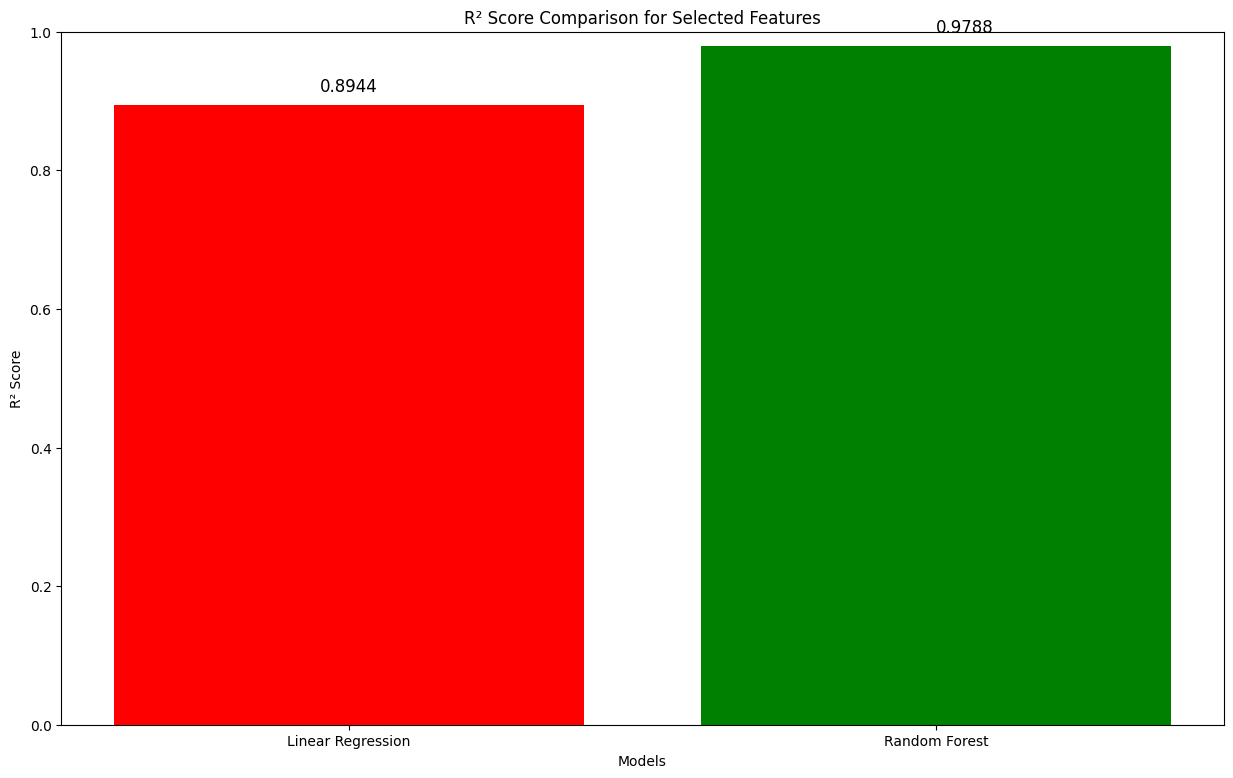

In [63]:
# Compute R² scores
r2_lr_selected = r2_score(y_test, y_pred_lr_selected)
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

# Define models and scores
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_lr_selected, r2_rf_selected]

# Plot R² scores
plt.figure(figsize=(15, 9))
plt.bar(models, r2_scores, color=['red', 'green'])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("R² Score Comparison for Selected Features")
plt.ylim(0, 1)  # R² scores range from 0 to 1 (can be negative for poor models)
plt.text(0, r2_lr_selected + 0.02, f"{r2_lr_selected:.4f}", ha='center', fontsize=12)
plt.text(1, r2_rf_selected + 0.02, f"{r2_rf_selected:.4f}", ha='left', fontsize=12)

plt.show()


## **7. Conclusion:**

#### 1. Model Performance  
The experiment involved training and evaluating two machine learning models—Linear Regression and Random Forest Regressor—on a dataset related to sleep health and lifestyle. The Random Forest Regressor outperformed the Linear Regression model across all metrics. Specifically, it achieved an R² score of 0.991 on the test set, compared to 0.974 for Linear Regression. The lower RMSE (0.072 vs. 0.125) and MAE (0.018 vs. 0.095) for Random Forest indicate better predictive accuracy and generalization.  

#### 2. Impact of Methods  
- Cross-Validation: Hyperparameter tuning using GridSearchCV and RandomizedSearchCV** improved model performance. The best parameters for Random Forest (e.g., n_estimators=100, max_depth=30) significantly enhanced accuracy.  
- Feature Selection: The Random Forest feature importance analysis revealed that "Quality of Sleep," "Systolic_BP," and "Stress Level" were the most influential predictors. Selecting the top five features and retraining the model led to minimal loss in accuracy while improving interpretability.  

#### 3. Insights and Future Directions  
This study highlights the importance of feature selection and hyperparameter optimization in regression tasks. The strong performance of Random Forest suggests that non-linear models are more suitable for this dataset.

Overall, the experiment demonstrates that Random Forest is a superior choice for predicting sleep duration based on health and lifestyle factors due to its robustness and high accuracy.  

